In [27]:
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gymnasium Environment

In [28]:
from n_puzzle.envs import NPuzzleEnv
env = NPuzzleEnv({}, n=5)

### Shuffle

In [29]:
num_samples=1000
empirical_k = []
for _ in tqdm(range(num_samples)):
    observation, info = env.reset(options={"k_moves": 100})
    k = env.get_effective_k(info["shuffle"])
    empirical_k.append(k)

100%|██████████| 1000/1000 [00:09<00:00, 106.71it/s]


Text(0, 0.5, '# of shuffles')

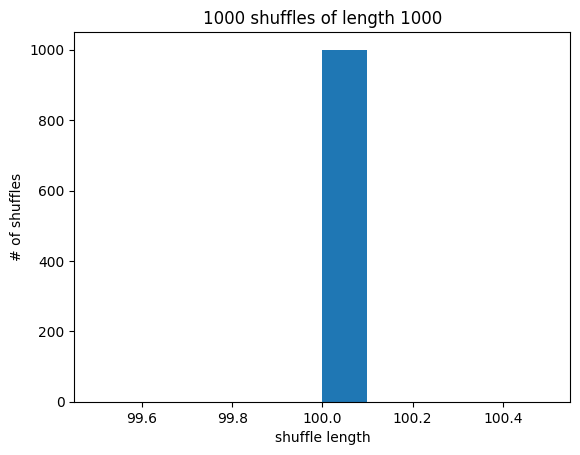

In [30]:
plt.hist(empirical_k)
plt.title("1000 shuffles of length 1000")
plt.xlabel("shuffle length")
plt.ylabel("# of shuffles")

### Unshuffle

In [31]:
num_samples=1000
solved = []
for _ in tqdm(range(num_samples)):
    observation, info = env.reset(options={"k_moves": 5})
    solution = env.get_unshuffle(info["shuffle"])
    for move in solution[:-1]:
        env.step(move)
    last = env.step(solution[-1])
    if not last[2]:
        print(info["shuffle"])
        print(solution)
        print(env._get_obs())
        break
    solved.append(last[2])

100%|██████████| 1000/1000 [00:00<00:00, 1827.45it/s]


# Harsha's Simulator

In [42]:
from simulator.game15 import Grid
env = Grid(5)

### Shuffle

In [44]:
num_samples=1000
empirical_k = []
for _ in tqdm(range(num_samples)):
    env.reset()
    env.shuffle(10)
    k = env.get_effective_k(env._shuffle)
    empirical_k.append(k)

100%|██████████| 1000/1000 [00:00<00:00, 1020.52it/s]


Text(0, 0.5, '# of shuffles')

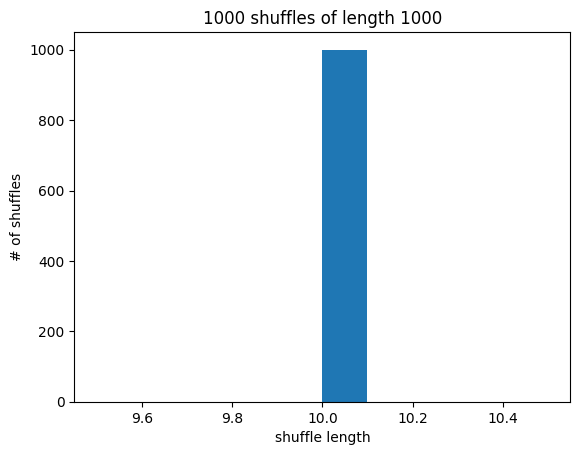

In [45]:
plt.hist(empirical_k)
plt.title("1000 shuffles of length 1000")
plt.xlabel("shuffle length")
plt.ylabel("# of shuffles")

In [51]:
num_samples=1000
solved = []
for _ in tqdm(range(num_samples)):
    env.reset()
    env.shuffle(100)
    solution = env.get_unshuffle(env._shuffle)
    for move in solution[:-1]:
        env.process_action(move)
    reward = env.process_action(solution[-1])
    if reward != 100:
        print(solution)
        break

100%|██████████| 1000/1000 [00:10<00:00, 99.96it/s]
